# 🎓 Student Depression Prediction using ML 
Makine öğrenmesiyle öğrenci depresyonunun tahmini: Feature engineering, model karşılaştırmaları ve yorumlanabilirlik analizleriyle kapsamlı bir proje.

## 🎯 Amaç
Bu proje, öğrencilerin depresyonda olup olmadığını çeşitli bireysel, akademik ve yaşam tarzı verilerine göre tahmin etmek için makine öğrenmesi modelleri kullanmaktadır. 


## 📊 Veri Seti
- **Kaynak**: [Veri kaynağı linki veya adı] (örneğin: student_depression_dataset.csv)
- **Satır Sayısı**: 27,000+
- **Sütun Sayısı**: 33
- **Hedef Değişken**: `Depression` (0: Yok, 1: Var)

In [1]:
import numpy as np
import pandas as pd 

In [3]:
df = pd.read_csv('student_depression_dataset.csv')
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

## 🔧 Süreç Adımları
1. **Exploratory Data Analysis (EDA)**  
   - Hedef değişken dengesi
   - Kategorik/sayısal sütun ayrımı  
2. **Preprocessing**  
   - OneHotEncoder, StandardScaler, ColumnTransformer
4. **Model Eğitimi**  
   - Logistic Regression  
   - Random Forest  
   - XGBoost  
   - Gradient Boosting  
   - Ensemble VotingClassifier
5. **Feature Engineering**  
   - `Satisfaction_Diff`, `Sleep_Short`, `Study_Load_Per_Hour`, vs.
6. **Model Karşılaştırması**  
   - Accuracy, Precision, Recall, F1-score
7. **SHAP Analizi**  
   - Global: summary plot  
   - Lokal: waterfall plot

### Exploratory Data Analysis (EDA)

In [11]:
# Hedef değişken olan Depression sütunudaki veri dağılımı inceleyeceğiz.

import seaborn as sns 
import matplotlib.pyplot as plt 

print(df["Depression"].value_counts())

Depression
1    16336
0    11565
Name: count, dtype: int64


In [12]:
# Kategorik ve Numerik Sayısal Sütunları listeleme

categorical_cols = df.select_dtypes(include=["object", "bool"]).columns.tolist()
print(f"Kategorik Sütunlar: {categorical_cols}\n")

numerical_cols = df.select_dtypes(include=["int64","float64"]).columns.tolist()
print(f"Sayısal Sütunlar: {numerical_cols}\n")

Kategorik Sütunlar: ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']

Sayısal Sütunlar: ['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Depression']



### Preprocessing

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [18]:
x = df.drop(columns=["id","Depression"])
y = df["Depression"]

In [20]:
categorical_cols = [
    'Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
    'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress',
    'Family History of Mental Illness'
]

In [22]:
numerical_cols = [
    'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
    'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours'
]

In [24]:
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [26]:
numerical_transformer = StandardScaler()

In [28]:
preprocessor = ColumnTransformer(transformers=[("cat",categorical_transformer, categorical_cols),("num",numerical_transformer, numerical_cols)])

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
# stratify dengesiz veri setlerinde train ve test bölünmesininde aynı ordan olmasını sağlar. 

#### LogisticRegression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [35]:
logistic_pipeline = Pipeline(steps=[("preprocessing", preprocessor),("classifier", LogisticRegression(max_iter=1000))])

In [37]:
logistic_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'City',
                                                   'Profession',
                                                   'Sleep Duration',
                                                   'Dietary Habits', 'Degree',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Financial Stress',
                                                   'Family History of Mental '
                                                   'Illness']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Academic Pressure',
                                                   'Work Pressure', 'CGPA',
                                                   'Study Satisfaction',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [39]:
y_pred = logistic_pipeline.predict(x_test)

In [41]:
# Confusion Matrix ve rapor
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=3))

# Temel metrikler
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")

Confusion Matrix:
 [[1837  476]
 [ 401 2867]]

Classification Report:

              precision    recall  f1-score   support

           0      0.821     0.794     0.807      2313
           1      0.858     0.877     0.867      3268

    accuracy                          0.843      5581
   macro avg      0.839     0.836     0.837      5581
weighted avg      0.842     0.843     0.842      5581


Accuracy: 0.843
Precision: 0.858
Recall: 0.877
F1-score: 0.867


#### RandomForestClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc_pipeline = Pipeline(steps=[("preprocessor",preprocessor),("classifier",RandomForestClassifier(
    n_estimators=100, max_depth=None, random_state=42, class_weight="balanced"
))])



In [48]:
rfc_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'City',
                                                   'Profession',
                                                   'Sleep Duration',
                                                   'Dietary Habits', 'Degree',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Financial Stress',
                                                   'Family History of Mental '
                                                   'Illness']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Academic Pressure',
                                                   'Work Pressure', 'CGPA',
                                                   'Study Satisfaction',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [49]:
y_pred_rf = rfc_pipeline.predict(x_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Confusion Matrix ve rapor
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, digits=3))

# Temel skorlar
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"\nAccuracy: {acc_rf:.3f}")
print(f"Precision: {prec_rf:.3f}")
print(f"Recall: {rec_rf:.3f}")
print(f"F1-score: {f1_rf:.3f}")

Confusion Matrix:
 [[1808  505]
 [ 400 2868]]

Classification Report:
               precision    recall  f1-score   support

           0      0.819     0.782     0.800      2313
           1      0.850     0.878     0.864      3268

    accuracy                          0.838      5581
   macro avg      0.835     0.830     0.832      5581
weighted avg      0.837     0.838     0.837      5581


Accuracy: 0.838
Precision: 0.850
Recall: 0.878
F1-score: 0.864


#### XCBClassifier

In [52]:
!pip install xgboost

In [53]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [54]:
imbalance_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"scale_pos_weight değeri: {imbalance_ratio:.2f}")

scale_pos_weight değeri: 0.71


In [55]:
xgb_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("classifier", XGBClassifier(
                               objective='binary:logistic',
                           scale_pos_weight=imbalance_ratio,
                           eval_metric="logloss",
                           use_label_encoder=False,
                           random_state=42))])

In [56]:
param_grid = {
    'classifier__n_estimators':[100,200],
    'classifier__max_depth':[3,5,7],
    'classifier__learning_rate':[0.05, 0.1],
    'classifier__subsample':[0.8,1.0]
}

In [57]:
xgb_grid = GridSearchCV(xgb_pipe, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)

In [58]:
xgb_grid.fit(x_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.2s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.2s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.2s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.2s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.2s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.2s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.3s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.3s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.2s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.3s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.3s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.2s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.2s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.3s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.4s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.4s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.4s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.3s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.4s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.4s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.4s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.4s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.3s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.4s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.2s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.6s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.6s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.2s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.2s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.6s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.6s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.2s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.5s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.3s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.7s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.3s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.3s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.3s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.3s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.2s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.2s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.2s
[CV] END clas

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.4s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.4s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.5s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.4s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.4s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.3s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.5s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.3s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.4s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.4s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.6s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.6s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.6s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.5s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.5s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Gender',
                                                                          'City',
                                                                          'Profession',
                                                                          'Sleep '
                                                                          'Duration',
                                                                          'Dietary '
                                                                          'Habits',
                                                                          'Degree',
                                                                          'Have '
                                                                          'you '
                                                                          'ever '
                                                                          'had '
                                                                          'suicidal '
                                                                          'thoughts '
                                                                          '?',
                                                                          'Financial '
                                                                          'Stress',
                                                                          'Family '
                                                                          'History '
                                                                          'of '
                                                                          'Mental '
                                                                          'Illness']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['Age'...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.05, 0.1],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 200],
                         'classifier__subsample': [0.8, 1.0]},
             scoring='f1', verbose=2)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [60]:
y_pred_xgb = xgb_grid.predict(x_test)

In [61]:
# Değerlendirme metrikleri
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb, digits=3))

print("\nBest Params:", xgb_grid.best_params_)

acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print(f"\nAccuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")

Confusion Matrix:
 [[1929  384]
 [ 491 2777]]

Classification Report:
               precision    recall  f1-score   support

           0      0.797     0.834     0.815      2313
           1      0.879     0.850     0.864      3268

    accuracy                          0.843      5581
   macro avg      0.838     0.842     0.840      5581
weighted avg      0.845     0.843     0.844      5581


Best Params: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 1.0}

Accuracy: 0.843
Precision: 0.879
Recall: 0.850
F1-score: 0.864


#### GradientBoostingClassifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
gbc_pipe = Pipeline(steps=[('preprocessor', preprocessor),('classifier', GradientBoostingClassifier(random_state=42))])


In [65]:
param_grid_gbc = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 5] 
}

In [66]:
gbc_grid= GridSearchCV(gbc_pipe, param_grid=param_grid_gbc,cv=3, scoring='f1', n_jobs=-1, verbose=2)

In [67]:
gbc_grid.fit(x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100; total time=   1.7s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100; total time=   1.7s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100; total time=   1.8s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100; total time=   3.3s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100; total time=   3.4s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200; total time=   3.5s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200; total time=   3.5s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200; total time=   3.7s
[CV] END classifier_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Gender',
                                                                          'City',
                                                                          'Profession',
                                                                          'Sleep '
                                                                          'Duration',
                                                                          'Dietary '
                                                                          'Habits',
                                                                          'Degree',
                                                                          'Have '
                                                                          'you '
                                                                          'ever '
                                                                          'had '
                                                                          'suicidal '
                                                                          'thoughts '
                                                                          '?',
                                                                          'Financial '
                                                                          'Stress',
                                                                          'Family '
                                                                          'History '
                                                                          'of '
                                                                          'Mental '
                                                                          'Illness']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Academic '
                                                                          'Pressure',
                                                                          'Work '
                                                                          'Pressure',
                                                                          'CGPA',
                                                                          'Study '
                                                                          'Satisfaction',
                                                                          'Job '
                                                                          'Satisfaction',
                                                                          'Work/Study '
                                                                          'Hours'])])),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.05, 0.1],
                         'classifier__max_depth': [3, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='f1', verbose=2)

In [68]:
y_pred_gbc = gbc_grid.predict(x_test)

In [69]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gbc))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gbc, digits=3))
print("Best Params:", gbc_grid.best_params_)

acc = accuracy_score(y_test, y_pred_gbc)
prec = precision_score(y_test, y_pred_gbc)
rec = recall_score(y_test, y_pred_gbc)
f1 = f1_score(y_test, y_pred_gbc)

print(f"\nAccuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")

Confusion Matrix:
 [[1837  476]
 [ 382 2886]]

Classification Report:
               precision    recall  f1-score   support

           0      0.828     0.794     0.811      2313
           1      0.858     0.883     0.871      3268

    accuracy                          0.846      5581
   macro avg      0.843     0.839     0.841      5581
weighted avg      0.846     0.846     0.846      5581

Best Params: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}

Accuracy: 0.846
Precision: 0.858
Recall: 0.883
F1-score: 0.871


#### VotingClassifier

In [71]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
logred = LogisticRegression(max_iter=1000)

In [73]:
xgb = XGBClassifier(
    learning_rate=0.05,
    max_depth=3,
    n_estimators=200,
    subsample=1.0,
    scale_pos_weight=imbalance_ratio,
    use_label_encoder=False,
    objective='binary:logistic',
    random_state=42 
)

In [74]:
lgbm = LGBMClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    num_leaves=15,
    class_weight='balanced',
    random_state = 42,
)

In [75]:
gbc = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    random_state=42
)

In [76]:
voting_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', VotingClassifier(
        estimators=[
            ('logred',logred),
            ('xgb',xgb),
            ('lgbm',lgbm),
            ('gbc',gbc)
        ],
        voting='soft',
        n_jobs=-1))
])

In [77]:
voting_clf.fit(x_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 13068, number of negative: 9252
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 452
[LightGBM] [Info] Number of data points in the train set: 22320, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'City',
                                                   'Profession',
                                                   'Sleep Duration',
                                                   'Dietary Habits', 'Degree',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Financial Stress',
                                                   'Family History of Mental '
                                                   'Illness']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Academic Pressure',
                                                   'Work Pressure', 'CGPA',
                                                   'Study Sa...
                                                             max_delta_step=None,
                                                             max_depth=3,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=200,
                                                             n_jobs=None,
                                                             num_parallel_tree=None, ...)),
                                              ('lgbm',
                                               LGBMClassifier(class_weight='balanced',
                                                              max_depth=3,
                                                              num_leaves=15,
                                                              random_state=42)),
                                              ('gbc',
                                               GradientBoostingClassifier(random_state=42))],
                                  n_jobs=-1, voting='soft'))])

In [78]:
y_pred_ensemble = voting_clf.predict(x_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ensemble, digits=3))

acc = accuracy_score(y_test, y_pred_ensemble)
prec = precision_score(y_test, y_pred_ensemble)
rec = recall_score(y_test, y_pred_ensemble)
f1 = f1_score(y_test, y_pred_ensemble)

print(f"\nAccuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")

Confusion Matrix:
 [[1888  425]
 [ 435 2833]]

Classification Report:
               precision    recall  f1-score   support

           0      0.813     0.816     0.814      2313
           1      0.870     0.867     0.868      3268

    accuracy                          0.846      5581
   macro avg      0.841     0.842     0.841      5581
weighted avg      0.846     0.846     0.846      5581


Accuracy: 0.846
Precision: 0.870
Recall: 0.867
F1-score: 0.868


### Future Engineering

In [80]:
# Satisfaction Difference 
df["Satisfaction_Diff"] = df["Study Satisfaction"] - df["Job Satisfaction"]
# akademik ve mesleki memnuniyet arasındaki fark büyükse depresyon riski olabilir

In [81]:
# Stress Sum Score
# Stres kaynaklarını tek bir değişkende toplamak, özellikle boosting modelleri için anlamlı olur.
df['Total_Stress_Score'] = df['Academic Pressure'] + df ['Work Pressure']

In [83]:
# Sleep Sufficiency Category
# Az uyuyan öğrencilerin depresyon riski daha yüksek olabilir.
df['Is_Sleep_Short'] = df['Sleep Duration'].apply(lambda x: 1 if "less" in x.lower() else 0)

In [86]:
# Work Study Load Ratio
# Yüksek stress + az saat -> daha çok depresyon anlamına gelir.
df['Study_Load_Per_Hour'] = df['Total_Stress_Score'] / (df['Work/Study Hours'] + 0.1)

In [87]:
# High CGPA with High Stress
# Yüksek başarı + yüksek stres = içsel baskı sinyali
df['CGPA_Stress_Conflict'] = df.apply( lambda row:1 if row['CGPA'] > 3.5 and row["Total_Stress_Score"] > 12 else 0, axis = 1)

In [88]:
x = df.drop(columns=["id","Depression"])
y = df["Depression"]

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [90]:
categorical_cols = [
    'Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
    'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress',
    'Family History of Mental Illness'
]

In [91]:
numerical_cols = [
    'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
    'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 
    'Satisfaction_Diff', 'Is_Sleep_Short', 'Total_Stress_Score',
    'Study_Load_Per_Hour','CGPA_Stress_Conflict'
]

In [92]:
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [93]:
numerical_transformer = StandardScaler()

In [94]:
preprocessor = ColumnTransformer(transformers=[("cat",categorical_transformer, categorical_cols),("num",numerical_transformer, numerical_cols)])

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
# stratify dengesiz veri setlerinde train ve test bölünmesininde aynı ordan olmasını sağlar. 

In [102]:
logred = LogisticRegression(max_iter=1000)

In [103]:
xgb = XGBClassifier(
    learning_rate=0.05,
    max_depth=3,
    n_estimators=200,
    subsample=1.0,
    scale_pos_weight=imbalance_ratio,
    use_label_encoder=False,
    objective='binary:logistic',
    random_state=42 
)

In [104]:
lgbm = LGBMClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    num_leaves=15,
    class_weight='balanced',
    random_state = 42,
)

In [105]:
gbc = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    random_state=42
)

In [106]:
voting_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', VotingClassifier(
        estimators=[
            ('logred',logred),
            ('xgb',xgb),
            ('lgbm',lgbm),
            ('gbc',gbc)
        ],
        voting='soft',
        n_jobs=-1))
])

In [107]:
voting_clf.fit(x_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 13068, number of negative: 9252
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 537
[LightGBM] [Info] Number of data points in the train set: 22320, number of used features: 86
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'City',
                                                   'Profession',
                                                   'Sleep Duration',
                                                   'Dietary Habits', 'Degree',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Financial Stress',
                                                   'Family History of Mental '
                                                   'Illness']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Academic Pressure',
                                                   'Work Pressure', 'CGPA',
                                                   'Study Sa...
                                                             max_delta_step=None,
                                                             max_depth=3,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=200,
                                                             n_jobs=None,
                                                             num_parallel_tree=None, ...)),
                                              ('lgbm',
                                               LGBMClassifier(class_weight='balanced',
                                                              max_depth=3,
                                                              num_leaves=15,
                                                              random_state=42)),
                                              ('gbc',
                                               GradientBoostingClassifier(random_state=42))],
                                  n_jobs=-1, voting='soft'))])

In [108]:
y_pred_ensemble = voting_clf.predict(x_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ensemble, digits=3))

acc = accuracy_score(y_test, y_pred_ensemble)
prec = precision_score(y_test, y_pred_ensemble)
rec = recall_score(y_test, y_pred_ensemble)
f1 = f1_score(y_test, y_pred_ensemble)

print(f"\nAccuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")

Confusion Matrix:
 [[1890  423]
 [ 435 2833]]

Classification Report:
               precision    recall  f1-score   support

           0      0.813     0.817     0.815      2313
           1      0.870     0.867     0.868      3268

    accuracy                          0.846      5581
   macro avg      0.841     0.842     0.842      5581
weighted avg      0.846     0.846     0.846      5581


Accuracy: 0.846
Precision: 0.870
Recall: 0.867
F1-score: 0.868


#### Feature Importance 

In [110]:
from xgboost import XGBClassifier

In [111]:
xgb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        learning_rate=0.05,
        max_depth=3,
        n_estimators=200,
        subsample=1.0,
        scale_pos_weight=imbalance_ratio,
        objective='binary:logistic',
        use_label_encoder=False,
        random_state=42
    ))
])

In [112]:
xgb_pipe.fit(x_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:17:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'City',
                                                   'Profession',
                                                   'Sleep Duration',
                                                   'Dietary Habits', 'Degree',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Financial Stress',
                                                   'Family History of Mental '
                                                   'Illness']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Academic Pressure',
                                                   'Work Pressure', 'CGPA',
                                                   'Study Sa...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [113]:
feature_names = (xgb_pipe.named_steps['preprocessor'].get_feature_names_out().tolist())

In [114]:
import pandas as pd
import numpy as np

In [115]:
importances = xgb_pipe.named_steps["classifier"].feature_importances_

In [116]:
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

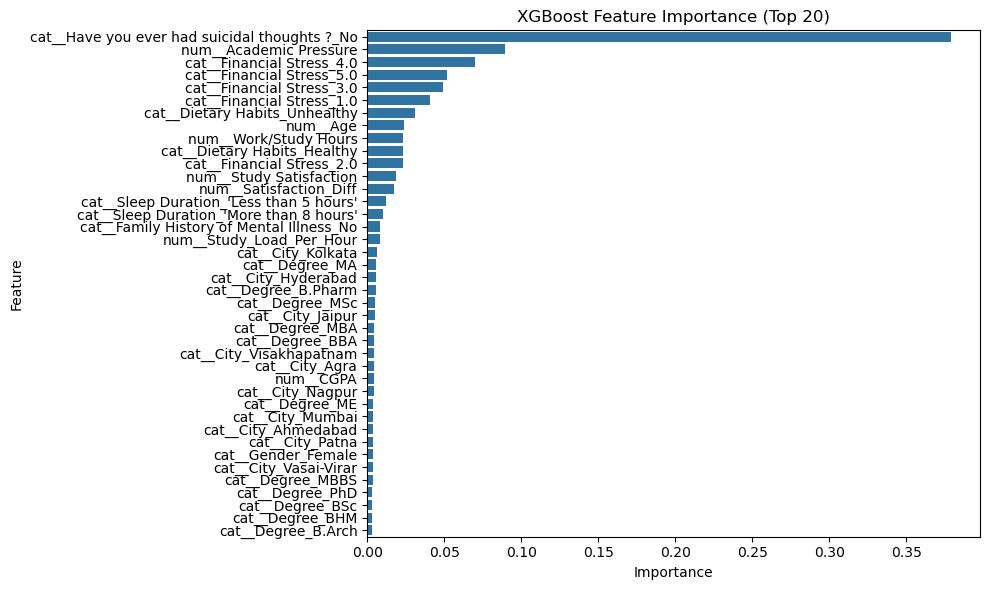

In [118]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(40), x="Importance", y="Feature")
plt.title("XGBoost Feature Importance (Top 20)")
plt.tight_layout()
plt.show()

### 📊 Model Karşılaştırması

| Model                  | Accuracy | Precision | Recall | F1-score |
|------------------------|----------|-----------|--------|----------|
| Logistic Regression    | 0.843    | 0.858     | 0.877  | 0.867    |
| XGBoost                | 0.843    | 0.879     | 0.850  | 0.864    |
| LightGBM               | 0.844    | 0.880     | 0.850  | 0.865    |
| Gradient Boosting      | 0.846    | 0.858     | 0.883  | 0.871    |
| **VotingClassifier**   | **0.846**| **0.870** | **0.867**| **0.868**|